In [1]:
import numpy as np
import pandas as pd 

In [8]:
#Support Vector Machine method:
class svm:
    def __init__(self, learn_rate=0.002, lambda_param=0.01, iter_rate=1000):
        self.learnr=learn_rate
        self.lamb=lambda_param
        self.iter_rate=iter_rate
        self.wt= None  #kept empty to update later
        self.bs= None
        
    def fitdata(self, X, y):
        n_samples,n_features= X.shape #srows=no. of rows, #fcols=no. of cols

        y_=np.where(y<=0, -1, 1) #conv values <=0 to -1 and else, +1. 
                            #ensures that y has value of -1 or +1 for right and left side of vector.
        self.wt= np.zeros(n_features) #both wt and bias initially set zero for each feature
        self.bs= 0
        
        for _ in range(self.iter_rate): #Gradient Descent
            for index, xin in enumerate(X):
                condition=y_[index]* (np.dot(xin, self.wt)- self.bs)>=1 #if yi.f(x)>=1
                if condition: #if newwt= oldwt minus dot product of learn_rate and dw
                    self.wt -= self.learnr * (2 * self.lamb * self.wt)
                else:
                    self.wt -= self.learnr * (2 * self.lamb * self.wt - np.dot(xin, y_[index]))
                    self.bs -= self.learnr * y_[index]

    def predict(self, X):
        linear_op= np.dot(X, self.wt)- self.bs #formule new input=(weight* old_input - bias)
        return np.sign(linear_op)

[0.45443237 0.17511972] -0.17400000000000013


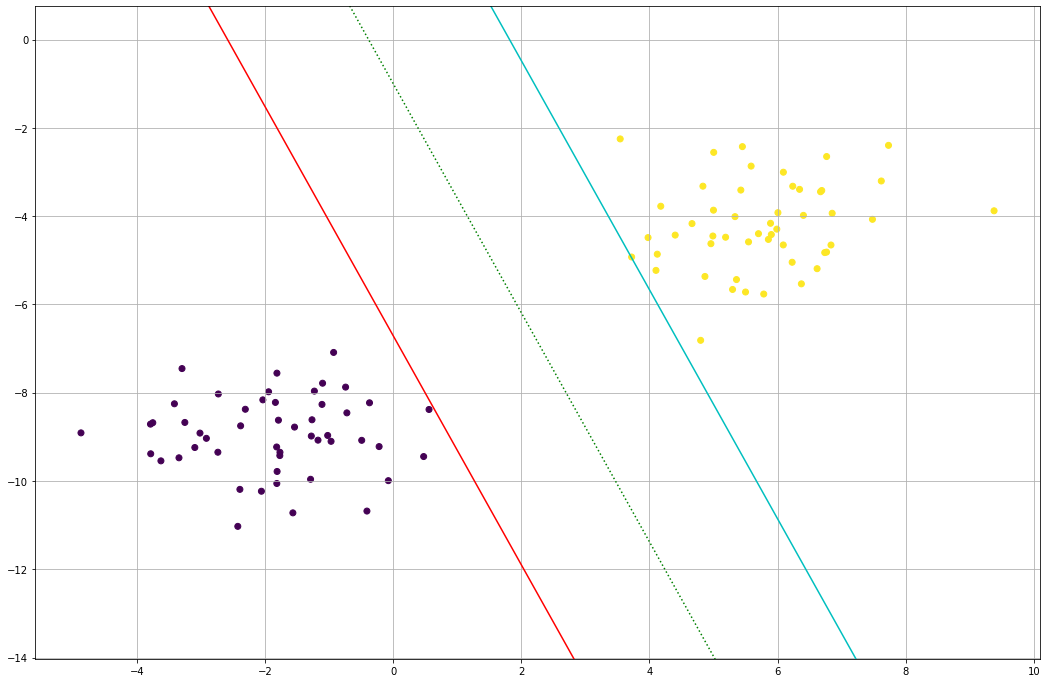

In [35]:
#Test the algorithm
if __name__ == "__main__":

    from sklearn import datasets
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    
    #setting randomized datapoints by method make_blobs
    X, y = datasets.make_blobs(n_samples= 100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
    y = np.where(y == 0, -1, 1)

    algo = svm()  #importing svm method
    algo.fitdata(X, y)

    print(algo.wt, algo.bs)

    #visualizing randomized points into svm plot
    def plotsvm():
        def hyperpln_val(x, wt, bs, offset):
            return (-wt[0] * x + bs + offset) / wt[1]
        
        fig = plt.figure()
        axis = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = hyperpln_val(x0_1, algo.wt, algo.bs, 0)
        x1_2 = hyperpln_val(x0_2, algo.wt, algo.bs, 0)

        x1_1_m = hyperpln_val(x0_1, algo.wt, algo.bs, -1)
        x1_2_m = hyperpln_val(x0_2, algo.wt, algo.bs, -1)

        x1_1_p = hyperpln_val(x0_1, algo.wt, algo.bs, 1)
        x1_2_p = hyperpln_val(x0_2, algo.wt, algo.bs, 1)

        axis.plot([x0_1, x0_2], [x1_1, x1_2], "g",linestyle = 'dotted')
        axis.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "r")
        axis.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "c")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        axis.set_ylim([x1_min - 3, x1_max + 3])
        
        fig.set_size_inches(18, 12, forward=True)


        plt.grid()
        plt.show()
    plotsvm()


In [ ]:
#Ashutosh Mahajan